In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import time

from sympy import init_printing
init_printing(use_latex=True)

In [2]:
def solve_1d_burger():
    x, nu, t = sp.symbols('x nu t')
    phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
           sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))
    
    phiprime = phi.diff(x)
    u = -2 * nu * (phiprime / phi) + 4
    ufunc = lambdify((t, x, nu), u)
    
    ###variable declarations
    nx = 201
    nt = 100
    dx = 2 * np.pi / (nx - 1)
    nu = .07
    dt = dx * nu
    
    x = np.linspace(0, 2 * np.pi, nx)
    un = np.empty(nx)
    t = 0
    
    u = np.asarray([ufunc(t, x0, nu) for x0 in x])
    plt.figure()
    plt.plot(x, u, marker='o', lw=2)
    plt.xlim([0, 2 * np.pi])
    plt.ylim([0, 10]);
    
    # Analytical solution
    u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])
    
    
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx-1):
            u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                    (un[i+1] - 2 * un[i] + un[i-1])
        u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                    (un[1] - 2 * un[0] + un[-2])
        u[-1] = u[0]
        
    return x, u, u_analytical

Execution time is : 254.72569465637207 ms


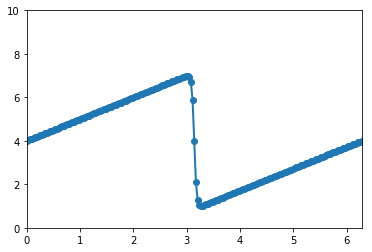

In [3]:
#compute the cpu time of the solving 1d linear diffusion
start = time.time()
x, u, u_analytical = solve_1d_burger()
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )      


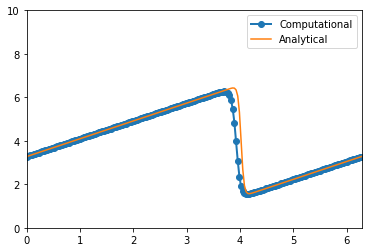

In [4]:
plt.figure()
plt.plot(x,u, marker='o', lw=2, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend();